<a href="https://colab.research.google.com/github/raghavbansal27/Totality-Corp-Assignment/blob/main/totality_corp_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat breed image classification model

## Importing libraries

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # for manipulating arrays
import pandas as pd # to load data

import os # to deal with directories

from matplotlib import pyplot as plt # to plot data

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [3]:
# Configs
batch_size = 768
nepochs = 10
img_width = 299
img_height = 299

## Reading data from google drive

In [4]:
cwd = os.getcwd()
cwd

'/content'

In [5]:
root_dir = cwd + '/drive/My Drive/Totality Corporation/images'

In [6]:
root_dir

'/content/drive/My Drive/Totality Corporation/images'

In [8]:
train_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input,
                                validation_split=0.2)

train_generator = train_data.flow_from_directory(root_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=256,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_data.flow_from_directory(root_dir,
                                                      target_size=(img_width, img_height),
                                                      batch_size=256,
                                                      class_mode='categorical',
                                                      shuffle='False',
                                                      subset='validation')

Found 12527 images belonging to 10 classes.
Found 3127 images belonging to 10 classes.


In [9]:
imgs, labels = next(train_generator)

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

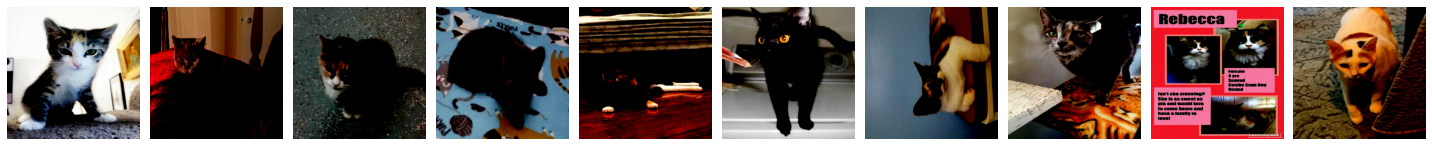

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
plotImages(imgs)
print(labels)

### To load saved model from drive

In [12]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/My Drive/Totality Corporation/inceptionV3_model_2.h5')
model.summary()

## Using pre-trained Inception-ResNetV2 model with added layers

In [12]:
model_base = InceptionResNetV2(weights='imagenet', 
                               include_top=False, 
                               input_shape=(img_width,img_height,3))

model = Sequential()
for layer in model_base.layers:
    layer.trainable = False


model.add(model_base)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               786944    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 55,190,634
Trainable params: 853,898
Non-trainable params: 54,336,736
______________________________________

In [14]:
history = model.fit_generator(train_generator, 
                    steps_per_epoch = train_generator.samples // batch_size,
                    validation_data = validation_generator, 
                    validation_steps = validation_generator.samples // batch_size,
                    epochs = nepochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
16/16 [==============================] - 193s 11s/step - loss: 1.5580 - accuracy: 0.4450 - val_loss: 1.2348 - val_accuracy: 0.5420
Epoch 2/10
16/16 [==============================] - 139s 9s/step - loss: 1.1747 - accuracy: 0.5862 - val_loss: 1.1512 - val_accuracy: 0.5625
Epoch 3/10
16/16 [==============================] - 92s 6s/step - loss: 1.1226 - accuracy: 0.5999 - val_loss: 1.0079 - val_accuracy: 0.6172
Epoch 4/10
16/16 [==============================] - 77s 5s/step - loss: 1.0433 - accuracy: 0.6303 - val_loss: 0.9942 - val_accuracy: 0.6201
Epoch 5/10
16/16 [==============================] - 62s 4s/step - loss: 1.0013 - accuracy: 0.6404 - val_loss: 1.0569 - val_accuracy: 0.5938
Epoch 6/10
16/16 [==============================] - 59s 4s/step - loss: 1.0190 - accuracy: 0.6335 - val_loss: 1.0896 - val_accuracy: 0.5938
Epoch 7/10
16/16 [==============================] - 54s 3s/step - loss: 0.9497 - accuracy: 0.6553 - val_loss: 1.0090 - val_accuracy: 0.6260
Epoch 8/10
16/16 

In [15]:
# Save model for further use
model.save('inceptionV3_model_2.h5')

## Prediction on validation data

In [22]:
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [18]:
classes = validation_generator.classes[validation_generator.index_array] # y_test

In [23]:
y_pred.shape

(3127,)

In [24]:
classes.shape

(3127,)

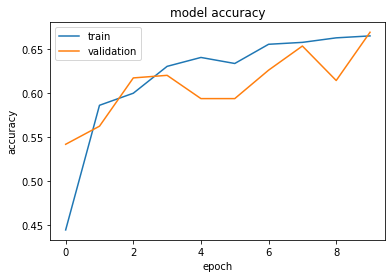

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

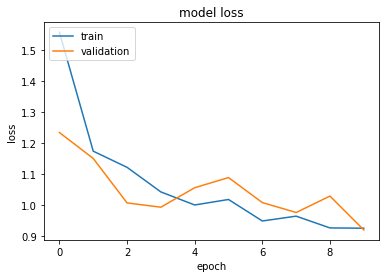

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluating metrics

In [27]:
validation_generator.class_indices.keys()

dict_keys(['Bombay', 'British Shorthair', 'Burmese', 'Calico', 'Dilute Calico', 'Himalayan', 'Munchkin', 'Ragdoll', 'Russian Blue', 'Siberian'])

#### Accuracy Score, Confusion Matrix, Classification Report

In [31]:
print("Accuracy Score: ", accuracy_score(classes,y_pred))


print('Confusion Matrix')
print(confusion_matrix(classes, y_pred))

print('\nClassification Report')
target_names = ['Bombay', 'British Shorthair', 'Burmese', 'Calico', 'Dilute Calico', 'Himalayan', 'Munchkin', 'Ragdoll', 'Russian Blue', 'Siberian']
print(classification_report(classes, y_pred, target_names=target_names))

Accuracy Score:  0.6635753118004477
Confusion Matrix
[[337   0   2  12   6   1   0   3   6   0]
 [  8  12   0  27  32   1   0  15  18   0]
 [ 11   0  10   4   7   5   0  25   6   0]
 [  9   2   0 491 156   2   0  27   6   0]
 [ 11   2   1 196 389   1   0  23  23   0]
 [  0   0   0   4   2 161   0  89   4   0]
 [  1   4   0  12   6   2   0  10   1   0]
 [  6   0   0  22  20  67   0 416   2   0]
 [ 43   2   2   9  42   3   0  15 258   0]
 [  1   1   0   5   8   1   0  19   1   1]]

Classification Report
                   precision    recall  f1-score   support

           Bombay       0.79      0.92      0.85       367
British Shorthair       0.52      0.11      0.18       113
          Burmese       0.67      0.15      0.24        68
           Calico       0.63      0.71      0.67       693
    Dilute Calico       0.58      0.60      0.59       646
        Himalayan       0.66      0.62      0.64       260
         Munchkin       0.00      0.00      0.00        36
          Ragdoll   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### F1-score

In [38]:
print("f1_score:", f1_score(classes, y_pred, average='micro'))

f1_score: 0.6635753118004477


#### ROC-AUC score for multiclass

In [39]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

roc_auc_multiclass = roc_auc_score_multiclass(classes, y_pred)
print(roc_auc_multiclass)

{0: 0.9428237175690083, 1: 0.5512725276144951, 2: 0.5727121512220449, 3: 0.7944787112823267, 4: 0.7448562636408218, 5: 0.7951403235759705, 6: 0.5, 7: 0.8466818361321624, 8: 0.8327512426890646, 9: 0.5135135135135135}
